In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module
from sys import path as sysPath
from os import path as osPath
sysPath.append(osPath.join(osPath.dirname('./'), '../../src'))

import interfacePy.AxionMass as AM
from interfacePy.FT import FT #easy tick formatting

<IPython.core.display.Javascript object>


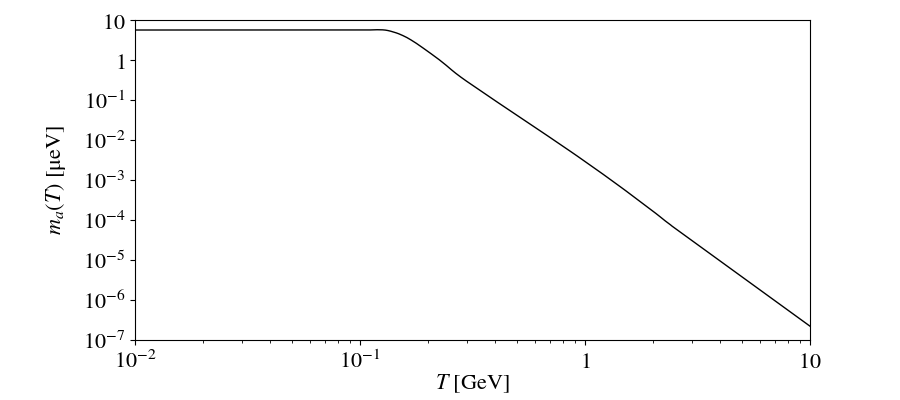

In [3]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
    X=np.logspace(-2,1,500)
    Y=[]
    for t in X:
        Y.append(AM.ma2(t,1e12)**0.5*1e15)
    sub.plot(X,Y,linestyle='-',linewidth=1,alpha=1,c='xkcd:black')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$ m_a(T) ~[{\rm \mu eV}]$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    #set major ticks
    _M_xticks=[ 10.**i for i in range(-2,2) ]
    _M_yticks=[ 10.**i for i in range(-7,2) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[j*10.**i for i in range(-2,2) for j in range(1,10)]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e-2,xmax=1e1,ymin=1e-7,ymax=1e1,xscale='log',yscale='log')

    ft.format_ticks(plt,sub)    

#     fig.savefig('axion_mass.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


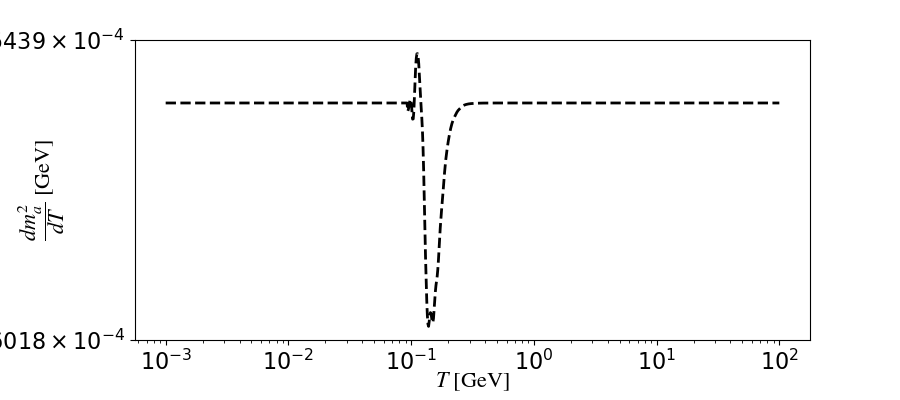

In [4]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=np.logspace(-3,2,1000)
    Y=[]
    for t in X:
        Y.append(AM.dma2dT(t,1))
    sub.plot(X,Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:black')
    

    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$ \dfrac{dm^2_{a}}{dT} ~[{\rm GeV}]$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    sub.set_yscale('symlog')
    sub.set_xscale('log')

    
    fig.show()